In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_td_salary_19-20')

In [3]:
tes.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [4]:
tes.head()

,NAME,TD,TD_rank,salary
0,Mark Andrews,10,1.0,863290
1,Jared Cook,9,2.0,7500000
2,Zach Ertz,6,5.0,8500000
3,Kyle Rudolph,6,5.0,9000000
4,Mike Gesicki,5,10.0,1652981


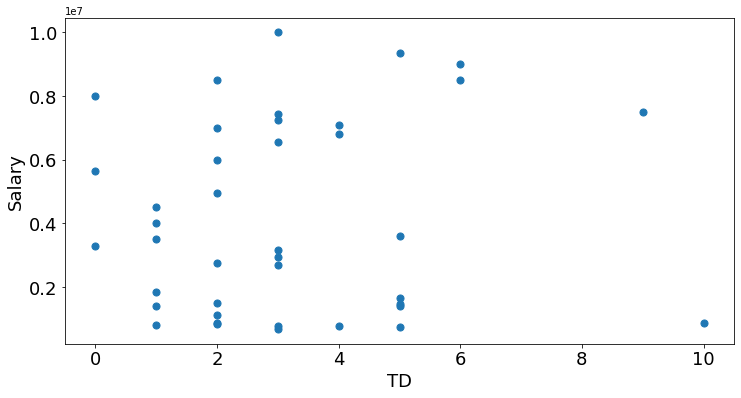

In [5]:
ax = tes.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['TD', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 0.00000000e+00, -2.22044605e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.79614637, -0.86230513],
       [-0.96456195,  0.35032974],
       [ 0.36745217,  1.30561821],
       [-0.43458285, -0.84946573],
       [ 2.93961736,  0.00386776]])

In [11]:
km.predict(X)

array([4, 4, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       1, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,TD,TD_rank,salary,clusters
0,Mark Andrews,10,1.0,863290,4
1,Jared Cook,9,2.0,7500000,4
2,Zach Ertz,6,5.0,8500000,2
3,Kyle Rudolph,6,5.0,9000000,2
4,Mike Gesicki,5,10.0,1652981,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[4.83333333e+00, 1.60645250e+06],
       [1.00000000e+00, 5.21170067e+06],
       [3.90000000e+00, 8.05184000e+06],
       [2.15384615e+00, 1.64462492e+06],
       [9.50000000e+00, 4.18164500e+06]])

In [14]:
tes.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,4.833333,1.606452e+06
1,1.000000,5.211701e+06
2,3.900000,8.051840e+06
3,2.153846,1.644625e+06
4,9.500000,4.181645e+06


In [15]:
centroids = tes.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

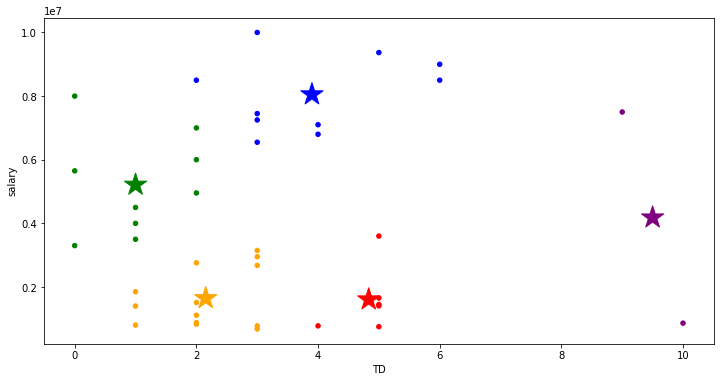

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.742252579426228

In [18]:
silhouette_score(X, km.labels_)

0.41666395397927863